In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os

from matplotlib import pyplot as plt
from dotenv import load_dotenv
from sklearn import preprocessing, model_selection, linear_model
from sklearn import metrics, dummy

load_dotenv()
sns.color_palette('colorblind')
plt.style.use('Solarize_Light2')

# Setting default DPI, pulling it from dotenv if it exists, setting it on 100 if not

try:
    pc_cores = int(os.getenv('CORES'))

except TypeError:
    pc_cores = 4

try:
    pc_dpi = int(os.getenv('DPI'))

except TypeError:
    pc_dpi = 100

if pc_dpi is None:
    pc_dpi = 100

if pc_dpi >= 155:
    pc_dpi = 155


In [2]:
file_ghg_eui = "./data/seattle_predict_ghg_eui.csv"


In [3]:
df_model = pd.read_csv(file_ghg_eui).astype(float)

df_model.columns


Index(['OSEBuildingID', 'scaled_NaturalGas(kWh)',
       'scaled_PropertyArea(SquareMetre)Total', 'scaled_Electricity(kWh)',
       'scaled_GHGEmissionsIntensity(kgCO2e/ft2)', 'scaled_SourceEUI(kWh/m2)',
       'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'ENERGYSTARScore',
       'Building_proportion', 'Parking_proportion', 'ohe_nbhood_BALLARD',
       'ohe_nbhood_CENTRAL', 'ohe_nbhood_DELRIDGE', 'ohe_nbhood_DOWNTOWN',
       'ohe_nbhood_EAST', 'ohe_nbhood_GREATER DUWAMISH',
       'ohe_nbhood_LAKE UNION', 'ohe_nbhood_MAGNOLIA / QUEEN ANNE',
       'ohe_nbhood_NORTH', 'ohe_nbhood_NORTHEAST', 'ohe_nbhood_NORTHWEST',
       'ohe_nbhood_SOUTHEAST', 'ohe_nbhood_SOUTHWEST', 'ohe_ptype_Hospital',
       'ohe_ptype_Hotel', 'ohe_ptype_K-12 School', 'ohe_ptype_Large Office',
       'ohe_ptype_Mixed Use Property', 'ohe_ptype_Office', 'ohe_ptype_Other',
       'ohe_ptype_Refrigerated Warehouse', 'ohe_ptype_Residence Hall',
       'ohe_ptype_Small & Medium medical facility',
       'ohe_pt

In [4]:
df_model.head(n=5)

,OSEBuildingID,scaled_NaturalGas(kWh),scaled_PropertyArea(SquareMetre)Total,scaled_Electricity(kWh),scaled_GHGEmissionsIntensity(kgCO2e/ft2),scaled_SourceEUI(kWh/m2),YearBuilt,NumberofBuildings,NumberofFloors,ENERGYSTARScore,...,ohe_ptype_Mixed Use Property,ohe_ptype_Office,ohe_ptype_Other,ohe_ptype_Refrigerated Warehouse,ohe_ptype_Residence Hall,ohe_ptype_Small & Medium medical facility,ohe_ptype_Small & Mid-Sized Office,ohe_ptype_Supermarket & Grocery store,ohe_ptype_Warehouse,ohe_ptype_Worship Facility
0,1.0,0.500705,0.389139,0.963847,1.770173,1.012887,1927.0,1.0,12.0,60.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,4.178122,0.659821,0.615322,1.799564,0.913481,1996.0,1.0,11.0,61.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.0,1.009034,-0.095878,0.380423,3.572830,1.536320,1926.0,1.0,10.0,56.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10.0,2.089235,0.292078,0.401384,1.074583,0.455283,1926.0,1.0,11.0,27.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17.0,2.706276,-0.029889,-0.326328,3.945117,0.564008,1928.0,1.0,9.0,48.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df_model.set_index("OSEBuildingID", inplace=True)


In [6]:
df_model.dropna(inplace=True)


In [7]:
ohe_cols = [col for col in df_model.columns if col.startswith("ohe")]

df_plot_features = df_model.drop(columns=ohe_cols)


In [8]:
df_train, df_test = model_selection.train_test_split(df_model, test_size=0.30)


In [9]:
# Target_1 : GHGEmissionsIntensity(kgCO2e/ft2)

X_train = df_train.drop(columns="scaled_GHGEmissionsIntensity(kgCO2e/ft2)").to_numpy()
X_test = df_test.drop(columns="scaled_GHGEmissionsIntensity(kgCO2e/ft2)").to_numpy()

y_train = df_train[["scaled_GHGEmissionsIntensity(kgCO2e/ft2)"]].to_numpy()
y_test = df_test[["scaled_GHGEmissionsIntensity(kgCO2e/ft2)"]].to_numpy()


In [10]:
lin_reg = linear_model.LinearRegression()

lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X=X_test)


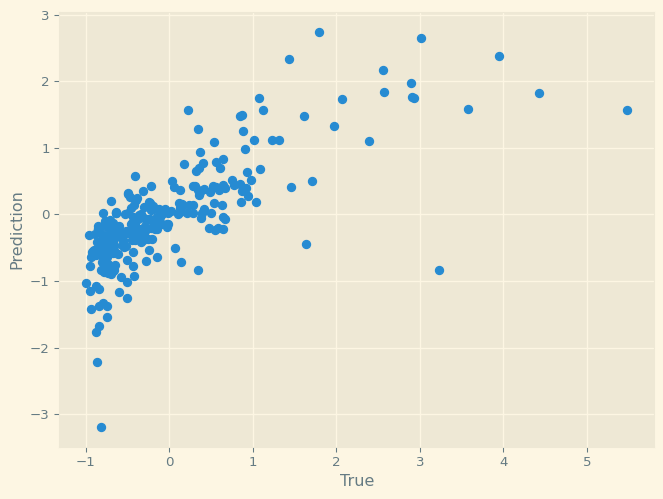

In [11]:
fig, (ax1) = plt.subplots(
    ncols=1,
    nrows=1,
    figsize=(8, 6),
    dpi=pc_dpi,
)

ax1.scatter(y_test, y_pred)

###
# Titles/Lables
ax1.set_xlabel("True")
ax1.set_ylabel("Prediction")
#
###

plt.show()


In [12]:
rse = metrics.mean_squared_error(y_true=y_test, y_pred=y_pred)

rmse = np.sqrt(rse)

print(f"RMSE = {rmse}")

r_two = metrics.r2_score(y_true=y_test, y_pred=y_pred)

print(f"R2 Score = {r_two}")

## Regression par une droite non concluante --> regression polynomiale


RMSE = 0.6487582902458202
R2 Score = 0.5698330449682418


In [13]:
df_train.head()

,scaled_NaturalGas(kWh),scaled_PropertyArea(SquareMetre)Total,scaled_Electricity(kWh),scaled_GHGEmissionsIntensity(kgCO2e/ft2),scaled_SourceEUI(kWh/m2),YearBuilt,NumberofBuildings,NumberofFloors,ENERGYSTARScore,Building_proportion,...,ohe_ptype_Mixed Use Property,ohe_ptype_Office,ohe_ptype_Other,ohe_ptype_Refrigerated Warehouse,ohe_ptype_Residence Hall,ohe_ptype_Small & Medium medical facility,ohe_ptype_Small & Mid-Sized Office,ohe_ptype_Supermarket & Grocery store,ohe_ptype_Warehouse,ohe_ptype_Worship Facility
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,
20552.0,-0.712658,-0.835013,-0.715476,-0.816248,-0.461113,1914.0,1.0,1.0,75.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
20967.0,0.477014,-0.600590,-0.757138,1.064786,-0.507709,1925.0,1.0,1.0,79.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24911.0,0.176230,-0.553527,-0.886358,0.398586,-1.104143,1929.0,1.0,3.0,88.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
22519.0,-0.045640,-0.605867,-0.339577,0.388789,0.483241,1989.0,1.0,1.0,66.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
95.0,3.658096,0.178006,0.326803,2.357996,0.849799,1908.0,1.0,7.0,71.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
scores_regression = model_selection.cross_val_score(
        lin_reg,
        X=X_train,
        y=y_train,
        scoring='r2',
        cv=50,
        n_jobs=-1,
    )

mean_r2_regression = scores_regression.mean()

print(f"Mean r2 score on 20 cv for linear regression = {mean_r2_regression}")


Mean r2 score on 20 cv for linear regression = 0.20050002431251238


In [15]:
y_pred_basic = lin_reg.predict(X_test)

rse_basic = metrics.mean_squared_error(y_true=y_test, y_pred=y_pred_basic)
rmse_basic = np.sqrt(rse_basic)

r2_basic = metrics.r2_score(y_true=y_test, y_pred=y_pred_basic)

mae_basic = metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred_basic)

print(f"""Metrics : \n######################
RMSE: {rmse_basic}\nr2_score : {r2_basic} \nMAE : {mae_basic}""")


Metrics : 
######################
RMSE: 0.6487582902458202
r2_score : 0.5698330449682418 
MAE : 0.42830078009417905


In [16]:
# Dummy 

dummy_reg_ghg = dummy.DummyRegressor()

scores_dummy = model_selection.cross_val_score(
        dummy_reg_ghg,
        X=X_train,
        y=y_train,
        scoring='r2',
        cv=50,
        n_jobs=-1,
    )

dummy_reg_ghg.fit(
    X=X_train,
    y=y_train
)


DummyRegressor()

In [17]:
y_pred_dummy = dummy_reg_ghg.predict(X_test)

rse_dummy = metrics.mean_squared_error(y_true=y_test, y_pred=y_pred_dummy)
rmse_dummy = np.sqrt(rse_dummy)

r2_dummy = metrics.r2_score(y_true=y_test, y_pred=y_pred_dummy)

mae_dummy = metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred_dummy)

print(f"""Metrics : \n######################
RMSE: {rmse_dummy}\nr2_score : {r2_dummy} \nMAE : {mae_dummy}""")


Metrics : 
######################
RMSE: 0.9891631670787886
r2_score : -1.6295391146892158e-05 
MAE : 0.7085308311497277


In [18]:
# # Ridge

# ridge = linear_model.Ridge()

# n_alphas = 200
# alphas = np.logspace(-5, 5, n_alphas)
# parameter = {"alpha": alphas}
# clf_ridge_ghg = model_selection.GridSearchCV(
#     estimator=ridge,
#     param_grid=parameter,
#     scoring="r2",
#     cv=50,
#     n_jobs=-1
# )

# clf_ridge_ghg.fit(
#         X=X_train,
#         y=y_train
#     )

# print("done .. ")


In [19]:
# best_alpha_ridge_ghg = clf_ridge_ghg.best_params_["alpha"]

# print("Best alpha for ridge = ", best_alpha_ridge_ghg)


In [20]:
# y_pred_ridge_ghg = clf_ridge_ghg.predict(X_test)

# rse_ridge_ghg = metrics.mean_squared_error(y_true=y_test, y_pred=y_pred_ridge_ghg)
# rmse_ridge_ghg = np.sqrt(rse_ridge_ghg)

# r2_ridge_ghg = metrics.r2_score(y_true=y_test, y_pred=y_pred_ridge_ghg)

# mae_ridge_ghg = metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred_ridge_ghg)

# print(f"""Metrics : \n######################
# RMSE: {rmse_ridge_ghg}\nr2_score : {r2_ridge_ghg} \nMAE : {mae_ridge_ghg}""")


In [21]:
# # Lasso

# lasso = linear_model.Lasso()
# parameter["alpha"] = np.arange(0.01, 10, 0.01)

# clf_lasso_ghg = model_selection.GridSearchCV(
#     estimator=lasso,
#     scoring="r2",
#     param_grid=parameter,
#     cv=50,
#     n_jobs=-1
# )

# clf_lasso_ghg.fit(
#         X=X_train,
#         y=y_train
#     )

# print("done .. ")


In [22]:
# best_alpha_lasso_ghg = clf_lasso_ghg.best_params_["alpha"]

# print("Best alpha for lasso = ", best_alpha_lasso_ghg)


In [23]:
# y_pred_lasso_ghg = clf_lasso_ghg.predict(X_test)

# rse_lasso_ghg = metrics.mean_squared_error(y_true=y_test, y_pred=y_pred_lasso_ghg)
# rmse_lasso_ghg = np.sqrt(rse_lasso_ghg)

# r2_lasso_ghg = metrics.r2_score(y_true=y_test,y_pred=y_pred_lasso_ghg)

# mae_lasso_ghg = metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred_lasso_ghg)

# print(f"""Metrics : \n######################
# RMSE: {rmse_lasso_ghg}\nr2_score : {r2_lasso_ghg} \nMAE : {mae_lasso_ghg}""")


In [24]:
# l1_range = np.arange(0.01, 0.99, 0.05)

# clf_elastic_net = linear_model.ElasticNetCV(
#     l1_ratio=l1_range,
#     n_alphas=200,
#     cv=50,
#     n_jobs=-1,
# )

# clf_elastic_net.fit(
#     X=X_train,
#     y=y_train
# )

# print("done .. ")


In [25]:
# print(clf_elastic_net.l1_ratio_)
# print(clf_elastic_net.alpha_)


In [26]:
# y_pred_enet_ghg = clf_elastic_net.predict(X_test)

# rse_enet_ghg = metrics.mean_squared_error(y_true=y_test, y_pred=y_pred_enet_ghg)
# rmse_enet_ghg = np.sqrt(rse_enet_ghg)

# r2_enet_ghg = metrics.r2_score(y_true=y_test,y_pred=y_pred_enet_ghg)

# mae_enet_ghg = metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred_enet_ghg)

# print(f"""Metrics : \n######################
# RMSE: {rmse_enet_ghg}\nr2_score : {r2_enet_ghg} \nMAE : {mae_enet_ghg}""")


In [27]:
# y_pred_lasso_ghg

# print((((y_pred_lasso_ghg) - y_test) ** 2).sum())

Classes test : Heresy : imports not in 1st cell

In [28]:
from scripts.models.regressions import Regressions

In [29]:
ghg_target = "scaled_GHGEmissionsIntensity(kgCO2e/ft2)"
ghg_regression = Regressions(dataframe=df_model, target_col=ghg_target)


In [34]:
ghg_regression.display_all_metrics()


###############

Standard :
 - rss  =  115.2440827068485
 - r2_score  =  0.5602311974153648
 - rsme  =  0.6644909401976701
 - mae  =  0.43839389556034225

###############

Ridge :
 - Ridge best alpha = 108.43659686896109
 - rss  =  121.44312122675973
 - r2_score  =  0.5365758071944888
 - rsme  =  0.68212851798254
 - mae  =  0.44557681094878493

###############

LASSO : 
 - Best LASSO alpha : 0.060000000000000005
 - rss  =  93846.4214935791
 - r2_score  =  0.5052901553560285
 - rsme  =  0.7047776641742423
 - mae  =  0.4564219837135043

###############

Elastic Net :
 - Elastic net best l1 ratio = 0.9600000000000001
 - Elastic net best alpha = 0.00886760419300405
 - rss  =  101838.60414201804
 - r2_score  =  0.5527296763114617
 - rsme  =  0.670134377278591
 - mae  =  0.4375922472674968


In [31]:
ghg_regression.df_predictions

,True,Elastic_Net,lasso,ridge,basic_regression
0,0.859048,0.438683,0.335171,0.356388,0.126649
1,2.328605,2.804898,2.532877,2.315344,2.871756
2,3.837350,-0.347113,-0.260111,-0.165013,-0.580100
3,0.261428,0.517627,0.440837,0.484014,0.619182
4,2.073881,1.206499,1.003419,1.088608,1.456888
...,...,...,...,...,...
256,-0.443960,-0.262218,-0.282384,-0.188442,-0.401934
257,-0.150048,0.731559,0.279010,0.383031,1.044592
258,0.643513,0.585018,0.526545,0.482197,0.613826
259,1.074583,1.623821,1.546000,1.522485,1.733170


In [32]:
ghg_regression.clf_ridge.best_params_

{'alpha': 108.43659686896109}

In [33]:
ghg_regression.clf_ridge.best_score_

0.35573683625023067

In [35]:
eui_target = "scaled_SourceEUI(kWh/m2)"
eui_regression = Regressions(dataframe=df_model, target_col=eui_target)


In [37]:
eui_regression.display_all_metrics()



###############

Standard :
 - rss  =  64.60465509516735
 - r2_score  =  0.7593506518808114
 - rsme  =  0.497521270055592
 - mae  =  0.35598641368785544

###############

Ridge :
 - Ridge best alpha = 9.547716114208066
 - rss  =  65.77528900922906
 - r2_score  =  0.7549900947678575
 - rsme  =  0.5020085672256276
 - mae  =  0.3518593173371328

###############

LASSO : 
 - Best LASSO alpha : 0.01
 - rss  =  111235.93645037457
 - r2_score  =  0.745371253966999
 - rsme  =  0.5117678781796747
 - mae  =  0.3513744663918833

###############

Elastic Net :
 - Elastic net best l1 ratio = 0.9600000000000001
 - Elastic net best alpha = 0.012716570333932403
 - rss  =  110678.24862236175
 - r2_score  =  0.7393547282861731
 - rsme  =  0.5177787624202215
 - mae  =  0.3578203055859664


In [38]:
eui_regression.df_predictions

,True,Elastic_Net,lasso,ridge,basic_regression
0,1.165102,1.127607,1.153692,1.162148,1.175314
1,-0.058831,0.033509,0.016252,0.023608,-0.048031
2,-0.874268,-0.793885,-0.838836,-0.918491,-1.008013
3,1.623300,1.753848,1.731868,1.613924,1.594039
4,1.132484,2.083526,2.069551,1.970987,1.943716
...,...,...,...,...,...
256,-1.436531,-0.933696,-0.941272,-0.972810,-1.002716
257,-1.029589,-1.054239,-1.059711,-1.065320,-1.078752
258,-0.765543,-0.907146,-0.905896,-0.906992,-0.889094
259,0.515858,0.347563,0.358333,0.397376,0.363759
